In [37]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True

In [38]:
#Importing the data that the C++ file created
firstTrajectory = np.loadtxt("trajectory1.csv", delimiter=",", dtype=float)

position1 = np.transpose(firstTrajectory)[:3]
position2 = np.transpose(firstTrajectory)[3:6]
momentum1 = np.transpose(firstTrajectory)[6:9]
momentum2 = np.transpose(firstTrajectory)[9:12]
J_momentum = np.transpose(np.transpose(firstTrajectory)[12:15])
energy = np.transpose(firstTrajectory)[15]
time_steps = np.transpose(firstTrajectory)[16]

(-0.7608777, 0.7608777, -0.3333506, 0.3333506)

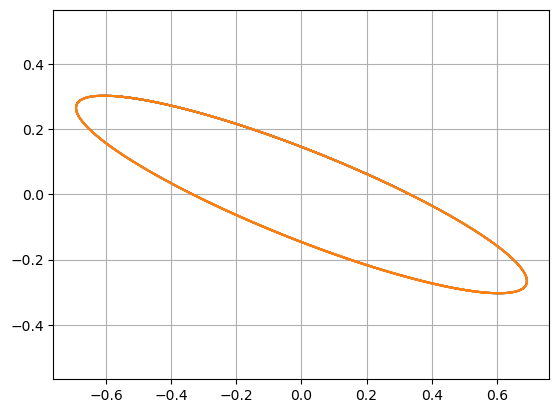

In [39]:
plt.plot(position1[0], position1[1])
plt.plot(position2[0], position2[1])
plt.axis("equal")


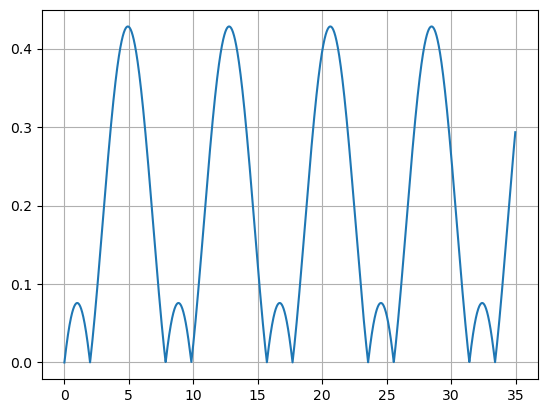

In [40]:
plt.plot(time_steps, abs((energy- energy[0])/energy[0]))
plt.title = "Energy deviation"

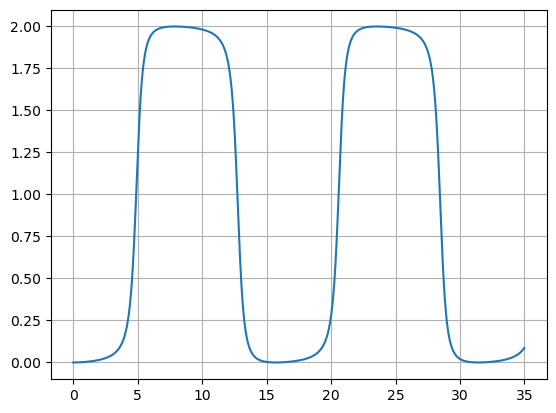

In [41]:
J_momentum_quantity =  1 - J_momentum.dot(J_momentum[0]) / (np.linalg.norm(J_momentum, axis = 1) * np.linalg.norm(J_momentum[0]))

plt.plot(time_steps, J_momentum_quantity)

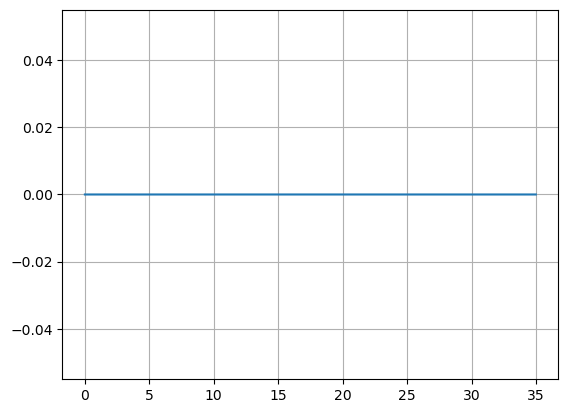

In [49]:
total_momentum_deviation = np.linalg.norm(np.transpose(momentum1 + momentum2) - np.transpose(momentum1 + momentum2)[0], axis = 1)

plt.plot(time_steps, total_momentum_deviation)